# Practice with Datasets

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Data/junkfood.csv")
df.head()

,Acne,Food,Frequency
0,5,Burgers,21
1,6,Chocolate,26
2,5,Ice cream,17
3,1,Ice cream,1
4,0,Cake,2


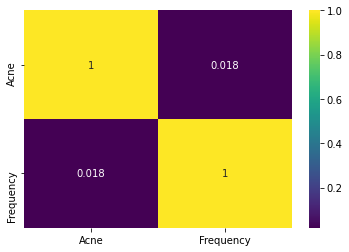

In [3]:
sns.heatmap(df[['Acne', 'Frequency']].corr(), annot=True, cmap='viridis');

In [4]:
corr, pval = ss.pearsonr(df['Acne'], df['Frequency'])
print('Correlation is {:.3f} with p-value of {:.3f}'.format(corr, pval))

Correlation is 0.018 with p-value of 0.566


In [5]:
foods = df['Food'].unique()
alpha = 0.05
for f in foods:
    df2 = df.loc[df['Food'] == f]
    corr, pval = ss.pearsonr(df2['Acne'], df2['Frequency'])
    if pval < alpha:
        print()
        print('Food = {}:'.format(f))
        print('Significant correlation is {:.3f} with p-value of {:.3f}'.format(corr, pval))
        print()
    else:
        print('No significant correlation for {}'.format(f))

No significant correlation for Burgers
No significant correlation for Chocolate
No significant correlation for Ice cream

Food = Cake:
Significant correlation is 0.229 with p-value of 0.033

No significant correlation for Donuts
No significant correlation for Lollies
No significant correlation for Pure Sugar
No significant correlation for Cheese Pizza
No significant correlation for Brownies
No significant correlation for Milkshakes
No significant correlation for Soft Drink


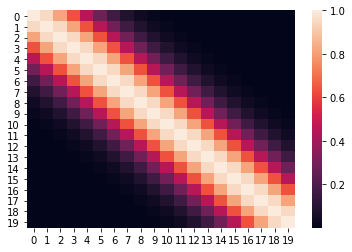

In [6]:
x = np.arange(20)
length = 20
cov = np.exp(-(1 / length) * (x - np.atleast_2d(x).T)**2)
sns.heatmap(cov);

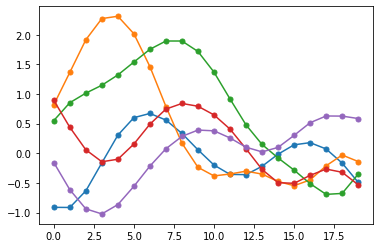

In [7]:
for i in range(5):
    plt.plot(x, ss.multivariate_normal.rvs(cov=cov), 'o-', ms=5)

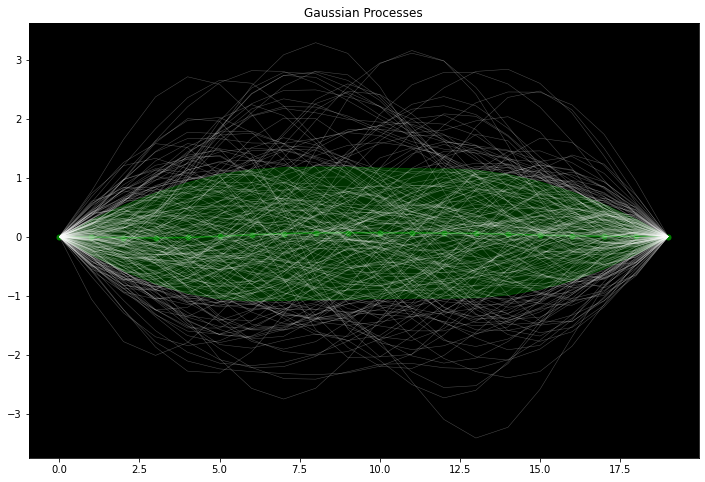

In [8]:
rvs = ss.multivariate_normal.rvs(cov=cov, size=200)
rvs -= np.linspace(rvs[:,0], rvs[:,-1], x.size).T

mean = rvs.mean(axis=0)
std = np.std(rvs, axis=0)

plt.figure(figsize=(12,8))
plt.gca().set_facecolor('k')
plt.plot(x, mean, 'o-', c='g', ms=5)
plt.fill_between(x, mean+std, mean-std, alpha=0.4, color='g')
for i in range(200):
    plt.plot(x, rvs[i,:], ls='-', c='w', alpha=0.3, lw=0.5)

plt.title('Gaussian Processes');

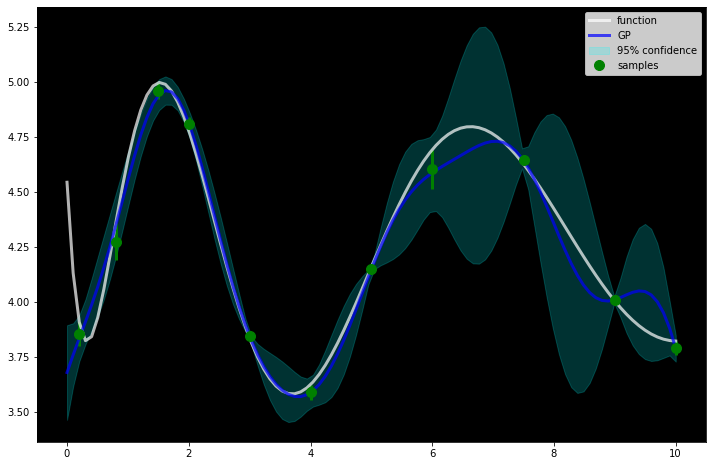

In [9]:
def fn(xs):
    return np.exp((xs + 10.5)**0.1) + np.sin(xs) / (xs + 1) + np.cos(2.5 * xs**0.5)**2

x_fine = np.linspace(0, 10, 100)
y_fine = fn(x_fine)

xs = np.array([0.2, 0.8, 1.5, 2, 3, 4, 5, 6, 7.5, 9, 10])
ys = fn(xs)

err_scale = np.random.uniform(low=0.03, high=0.1, size=ys.shape)
err = np.random.normal(loc=0, scale=err_scale, size=ys.shape)
ys_err = ys + err

from sklearn.gaussian_process import GaussianProcessRegressor
gp = GaussianProcessRegressor(alpha=err**2)
gp.fit(np.atleast_2d(xs).T, ys_err)
y_pred, sigma = gp.predict(np.atleast_2d(x_fine).T, return_std=True)

upper, lower = y_pred + 1.96 * sigma, y_pred - 1.96 * sigma

plt.figure(figsize=(12,8))
plt.gca().set_facecolor('k')
plt.errorbar(xs, ys_err, yerr=err, fmt='o', c='g', label='samples', ms=10, lw=3);
plt.plot(x_fine, y_fine, label='function', color='w', lw=3, alpha=0.7);
plt.plot(x_fine, y_pred, label='GP', color='b', lw=3, alpha=0.7);
plt.fill_between(x_fine, upper, lower, alpha=0.2, color='cyan', label='95% confidence');
plt.legend();

In [10]:
data = np.loadtxt("Data/cosmic_data.txt")
print(data.shape)

(20000, 2)


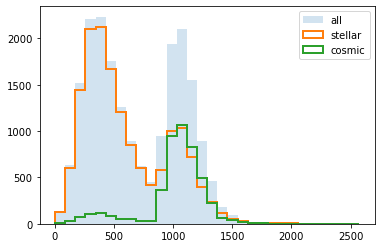

In [11]:
stellar, cosmic = data[:,0][data[:,1] > 0.5], data[:,0][data[:,1] < 0.5]

_, bins, _ = plt.hist(data[:,0], bins=30, alpha=0.2, label='all');
plt.hist(stellar, bins=bins, histtype='step', label='stellar', lw=2);
plt.hist(cosmic, bins=bins, histtype='step', label='cosmic', lw=2);
plt.legend();

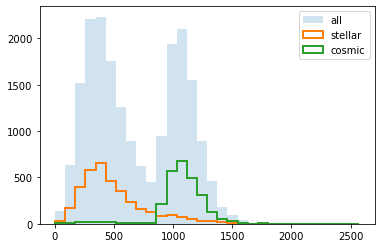

In [12]:
stellar, cosmic = data[:,0][data[:,1] > 0.9], data[:,0][data[:,1] < 0.1]

_, bins, _ = plt.hist(data[:,0], bins=30, alpha=0.2, label='all');
plt.hist(stellar, bins=bins, histtype='step', label='stellar', lw=2);
plt.hist(cosmic, bins=bins, histtype='step', label='cosmic', lw=2);
plt.legend();

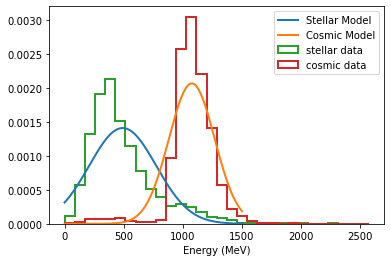

In [13]:
params_s = ss.norm.fit(stellar)
params_c = ss.norm.fit(cosmic)

xs = np.linspace(0, 1500, 200)
p_s = ss.norm.pdf(xs, *params_s)
p_c = ss.norm.pdf(xs, *params_c)

plt.plot(xs, p_s, label='Stellar Model', lw=2);
plt.plot(xs, p_c, label='Cosmic Model', lw=2);
plt.hist(stellar, bins=bins, histtype='step', label='stellar data', lw=2, density=True);
plt.hist(cosmic, bins=bins, histtype='step', label='cosmic data', lw=2, density=True);
plt.xlabel('Energy (MeV)');
plt.legend();

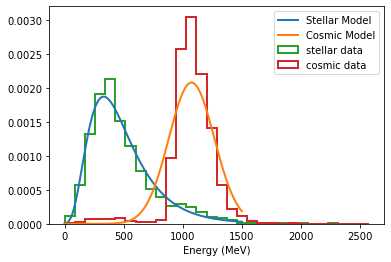

In [14]:
params_s = ss.lognorm.fit(stellar, loc=400, scale=100)
params_c = ss.lognorm.fit(cosmic, loc=1200, scale=100)

xs = np.linspace(0, 1500, 200)
p_s = ss.lognorm.pdf(xs, *params_s)
p_c = ss.lognorm.pdf(xs, *params_c)

plt.plot(xs, p_s, label='Stellar Model', lw=2);
plt.plot(xs, p_c, label='Cosmic Model', lw=2);
plt.hist(stellar, bins=bins, histtype='step', label='stellar data', lw=2, density=True);
plt.hist(cosmic, bins=bins, histtype='step', label='cosmic data', lw=2, density=True);
plt.xlabel('Energy (MeV)');
plt.legend();

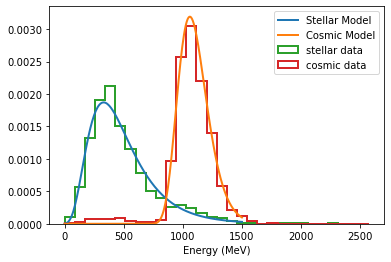

In [15]:
params_s = ss.lognorm.fit(stellar, loc=400, scale=100)
cosmic2 = cosmic[cosmic > 700]
params_c = ss.lognorm.fit(cosmic2, loc=1200, scale=100)

xs = np.linspace(0, 1500, 200)
p_s = ss.lognorm.pdf(xs, *params_s)
p_c = ss.lognorm.pdf(xs, *params_c)

plt.plot(xs, p_s, label='Stellar Model', lw=2);
plt.plot(xs, p_c, label='Cosmic Model', lw=2);
plt.hist(stellar, bins=bins, histtype='step', label='stellar data', lw=2, density=True);
plt.hist(cosmic, bins=bins, histtype='step', label='cosmic data', lw=2, density=True);
plt.xlabel('Energy (MeV)');
plt.legend();

In [16]:
test = 1200

n_stellar, n_cosmic = stellar.shape[0], cosmic.shape[0]
prob_cosmic = ss.lognorm.pdf(test, *params_c) * n_cosmic
prob_stellar = ss.lognorm.pdf(test, *params_s) * n_stellar

total_prob = prob_cosmic + prob_stellar
final = prob_cosmic / total_prob
print('The probability of this being a cosmic ray is {:.3f}%'.format(100 * final))

The probability of this being a cosmic ray is 93.382%


In [17]:
data_small = np.loadtxt("Data/emission_small.txt")
data_large = np.loadtxt("Data/emission_large.txt")
standard = 1

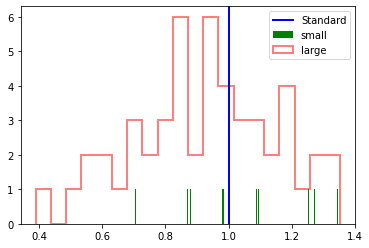

In [18]:
plt.hist(data_small, bins=200, label='small', color='g');
plt.hist(data_large, lw=2, bins=20, label='large', alpha=0.5, color='r', histtype='step');
plt.axvline(standard, label='Standard', lw=2, c='b');
plt.legend();

In [19]:
mean, std = data_small.mean(), data_small.std() / np.sqrt(data_small.size)
xs = np.linspace(0.5, 1.4, 200)
ps = ss.t.pdf(xs, 9, mean, std)
prob_fail = ss.t.sf(standard, 9, mean, std)
print('There is a {0:.2%} chance that the vehicle fails emission testing'.format(prob_fail))

There is a 77.23% chance that the vehicle fails emission testing


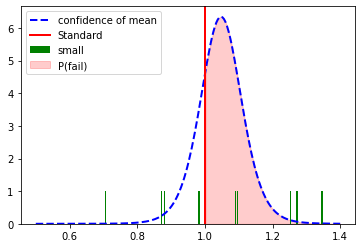

In [20]:
plt.hist(data_small, bins=200, label='small', color='g');
plt.plot(xs, ps, lw=2, c='b', ls='--', label='confidence of mean');
plt.axvline(standard, label='Standard', lw=2, c='r');
plt.fill_between(xs, ps, 0, where=xs>=standard, alpha=0.2, color='r', label='P(fail)');
plt.legend();

There is a 98.80% chance that the vehicle passes emission testing


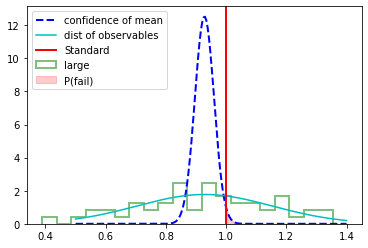

In [21]:
mean, std = data_large.mean(), data_large.std() / np.sqrt(data_large.size)
xs = np.linspace(0.5, 1.4, 200)
ps = ss.norm.pdf(xs, mean, std)
prob_pass = ss.norm.cdf(standard, mean, std)
print('There is a {0:.2%} chance that the vehicle passes emission testing'.format(prob_pass))

plt.hist(data_large, lw=2, bins=20, label='large', alpha=0.5, color='g', histtype='step', density=True);
plt.plot(xs, ps, lw=2, c='b', ls='--', label='confidence of mean');
plt.plot(xs, ss.norm.pdf(xs, mean, data_large.std()), label='dist of observables', color='c');
plt.axvline(standard, label='Standard', lw=2, c='r');
plt.fill_between(xs, ps, 0, where=xs>=standard, alpha=0.2, color='r', label='P(fail)');
plt.legend();

In [22]:
df = pd.read_csv("Data/Diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
df.drop(['Pregnancies', 'DiabetesPedigreeFunction'], axis=1, inplace=True)
df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
0,148,72,35,0,33.6,50,1
1,85,66,29,0,26.6,31,0
2,183,64,0,0,23.3,32,1
3,89,66,23,94,28.1,21,0
4,137,40,35,168,43.1,33,1


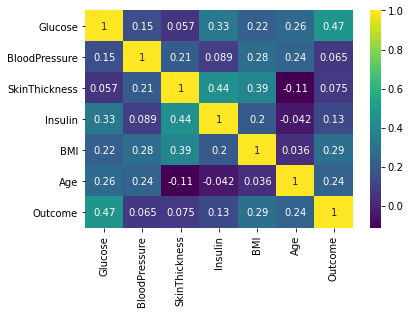

In [24]:
sns.heatmap(df.corr(), annot=True, cmap='viridis');

In [25]:
df2 = df[['Glucose', 'BMI', 'Age', 'Outcome']]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Glucose  768 non-null    int64  
 1   BMI      768 non-null    float64
 2   Age      768 non-null    int64  
 3   Outcome  768 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 24.1 KB


In [26]:
df3 = df2.loc[(df2['Glucose'] > 1) & (df2['BMI'] > 1), ['Glucose', 'BMI', 'Outcome']]
df3.head()

,Glucose,BMI,Outcome
0,148,33.6,1
1,85,26.6,0
2,183,23.3,1
3,89,28.1,0
4,137,43.1,1


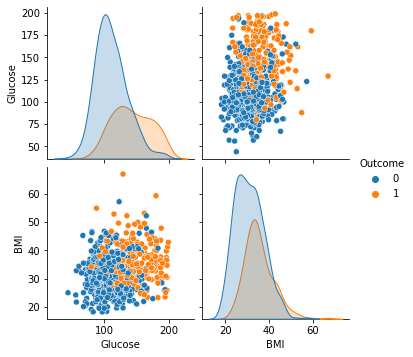

In [27]:
sns.pairplot(df3, hue='Outcome');

In [28]:
prob_test = []
test_point = [140, 35]
x, y = np.meshgrid(np.linspace(50, 200, 20), np.linspace(10, 50, 20), indexing='ij')
pts = np.dstack((x.flatten(), y.flatten()))

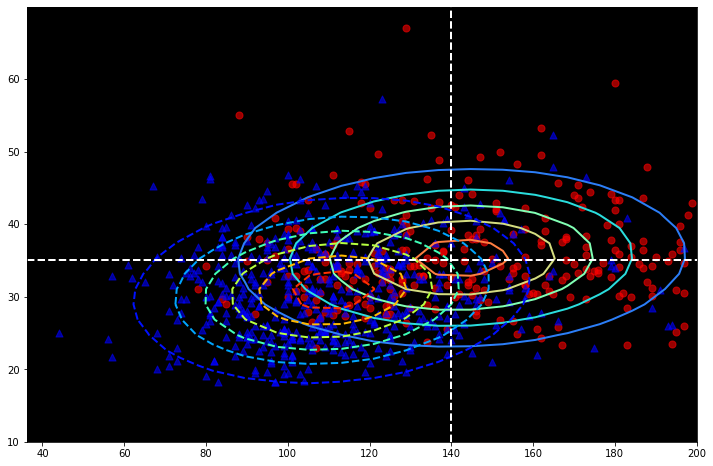

In [29]:
df_y = df3.loc[df3['Outcome'] == 1, ['Glucose', 'BMI']]
df_n = df3.loc[df3['Outcome'] == 0, ['Glucose', 'BMI']]

plt.figure(figsize=(12,8))
plt.gca().set_facecolor('k')
for d, l in zip([df_y, df_n], ['yes', 'no']):
    is_yes = l == 'yes'
    mean = np.mean(d)
    cov = np.cov(d, rowvar=0)
    probs = ss.multivariate_normal.pdf(pts, mean, cov).reshape(x.shape)
    prob_test.append(ss.multivariate_normal.pdf(test_point, mean, cov))
    plt.contour(x, y, probs, cmap='rainbow' if is_yes else 'jet', linestyles='-' if is_yes else '--', linewidths=2)
    marker = 'o' if is_yes else '^'
    color = 'r' if is_yes else 'b'
    plt.scatter(d['Glucose'], d['BMI'], c=color, marker=marker, alpha=0.6, s=50, label=l)

plt.axvline(test_point[0], color='w', ls='--', lw=2);
plt.axhline(test_point[1], color='w', ls='--', lw=2);

In [30]:
n_yes = df_y.shape[0]
n_no = df_n.shape[0]
prob_diagnosis = n_yes * prob_test[0] / (n_yes * prob_test[0] + n_no * prob_test[1])
print('Positive diagnosis chance is {:.2f}%'.format(100 * prob_diagnosis))

Positive diagnosis chance is 49.95%
